1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

1. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

2. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

3. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.
 
5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten


# 1

In [2]:
v = np.random.randn(30).reshape((10,3))
zerodotfive =np.empty(10)
for i in range(10):
    zerodotfive[i]=min(v[i], key=lambda x: abs(0.5-x))
print(v,'\n', zerodotfive)

[[ 1.09473312 -0.38646552 -1.16919594]
 [ 0.30603183  0.65945277 -1.2793817 ]
 [-0.1074505  -0.76415575  0.67851385]
 [-1.24805626  0.46268742 -1.0431508 ]
 [ 0.20023441 -0.97996958  0.15862374]
 [-0.51714878 -0.84483969 -1.35427905]
 [ 0.47810812  1.1386621   2.29188869]
 [-1.66098825  0.2928057   1.01204523]
 [-0.68231612 -1.73496735  0.17482255]
 [-0.96827537  0.80817536  1.7508517 ]] 
 [ 1.09473312  0.65945277  0.67851385  0.46268742  0.20023441 -0.51714878
  0.47810812  0.2928057   0.17482255  0.80817536]


# 2

In [3]:
b = np.random.randn(36).reshape((6,6))
result =np.empty(6)
for i in range(6):
    result[i]=b[i].sum()/b[:,i].min()
print(b,'\n', result)

[[ 0.2191882  -1.54693621  1.49934903  1.64067624  0.95907515 -1.14926677]
 [ 1.50905654  0.26873462 -1.79568125 -1.11515685  0.39824559 -0.60221509]
 [-1.05290879 -0.60287855 -0.6705142   1.1535164   0.45124365 -0.2446383 ]
 [ 1.30857016  0.61823159  0.76618463  0.4849701  -0.39930309  0.1513266 ]
 [ 0.71580842 -0.32353705 -0.38927898  0.76607637  0.89313086 -0.38821379]
 [-0.52937754  0.57448103  0.64395286 -1.5339023   0.3950246  -0.58694359]] 
 [-1.54057565  0.86429966  0.53805751 -1.91014773 -3.19052331  0.9021099 ]


# 3

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
y = np.empty((x.size - 1, 2))
for u in range(x.size - 1):
    y[u]=[x[u],x[u+1]]
e=list(filter(lambda x: x[0]==0,y))
e=np.array(e)
e[:,1].max()

5.0

# 4

In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for items in i:
    x[items]+=1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## 5

In [6]:
def assign(obs, codebook):     # Функция, определяющая для каждой точки индекс ближайшего центроида
    a=np.zeros(len(obs[:,0]),dtype=int)
    codebook_1=codebook[:,np.newaxis]
    a=np.argmin(np.sum((obs-codebook_1)**2,axis=2),axis=0)
    return a
               
def new_codebook(obs, codebook, a):   # Функция, определяющая новые центроиды из среднеарифметических по кластерам
    n_codebook=np.empty((len(codebook),2))
    for i in range(len(codebook)):
        n_codebook[i]=np.mean(obs[a==i], axis=0)
    return n_codebook
                    
def kmeans(obs, k_or_guess, iter=1000, thresh=1e-05):
    if type(k_or_guess)==int :
        j=np.random.choice(len(obs[:,0]), k_or_guess, replace=False)
        if len(np.unique(obs[j],axis=0))!=len(obs[j]):  #В базе присутствуют повторяющиеся значения, которые помешают работе алгоритма
            print("Перезапустите программу, в качестве случайных центроидов попались совпадающие")
            exit()
        n_codebook=obs[j]
    elif type(k_or_guess)==ndarray :
        n_codebook=k_or_guess
    else:
        print("ERROR")
    cur_iter=0
    a=assign(obs, n_codebook)
    distortion = 0.0
    n_distortion = np.mean((np.sum((obs-n_codebook[a])**2,axis=1))**0.5)/len(obs[:,0])
    codebook = np.zeros((len(n_codebook),2))
    while (np.allclose(codebook, n_codebook)==0) and (cur_iter<iter) and (abs(distortion-n_distortion)>thresh):
        a = assign(obs, n_codebook)
        codebook = n_codebook
        n_codebook = new_codebook(obs, n_codebook, a)
        cur_iter+=1
        distortion = n_distortion
        n_distortion = np.sum((np.sum((obs-n_codebook[a])**2,axis=1))**0.5)/len(obs[:,0])
    return codebook, n_distortion
    
        
    
    

## 6

## 1) Возраст-доход

In [7]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

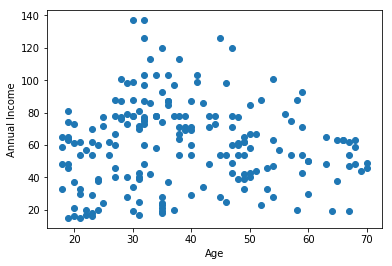

In [8]:
plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

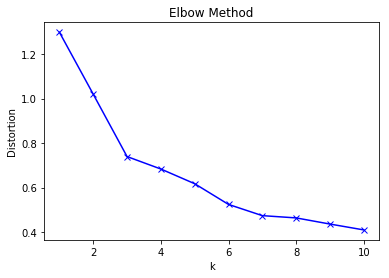

In [9]:
obs= np.column_stack((data[:, 2],data[:, 3]))
distortion=np.zeros(10)
for k in range(1,11):
    distortion[k-1]=kmeans(whiten(obs),k)[1]
plt.plot(range(1,11), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


### Выберем k=3

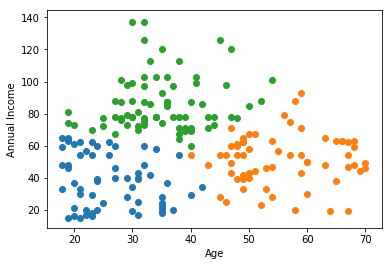

In [10]:
k=3
assignment=assign(whiten(obs), kmeans(whiten(obs),k)[0])
for i in range(k):
    plt.scatter(obs[assignment==i, 0], obs[assignment==i, 1])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

## 2)Возраст - покупательский индекс

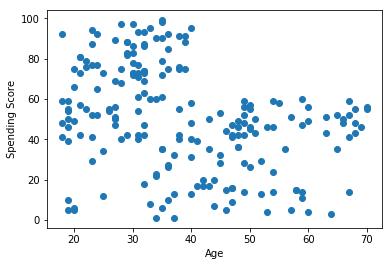

In [11]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

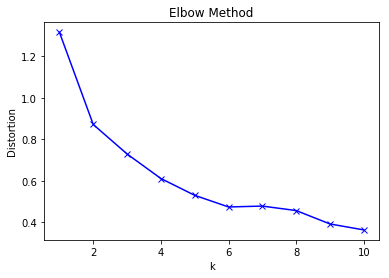

In [12]:
obs= np.column_stack((data[:, 2],data[:, 4]))
distortion=np.zeros(10)
for k in range(1,11):
    distortion[k-1]=kmeans(whiten(obs),k)[1]
plt.plot(range(1,11), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

## Выберем k=2

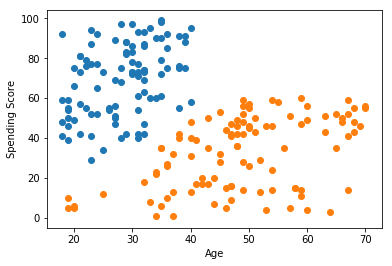

In [13]:
k=2
assignment=assign(whiten(obs), kmeans(whiten(obs),k)[0])
for i in range(k):
    plt.scatter(obs[assignment==i, 0], obs[assignment==i, 1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

## 3)доход-покупательский индекс

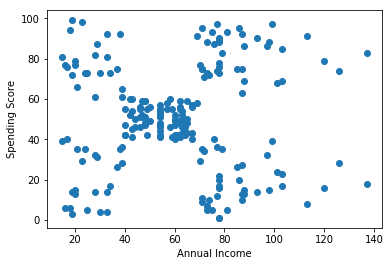

In [14]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

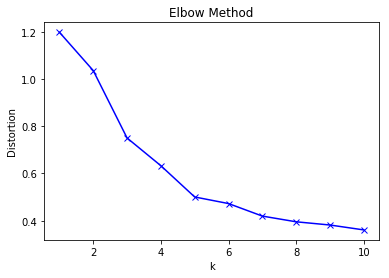

In [15]:
obs= np.column_stack((data[:, 3],data[:, 4]))
distortion=np.zeros(10)
for k in range(1,11):
    distortion[k-1]=kmeans(whiten(obs),k)[1]
plt.plot(range(1,11), distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

## Возьмём k=5

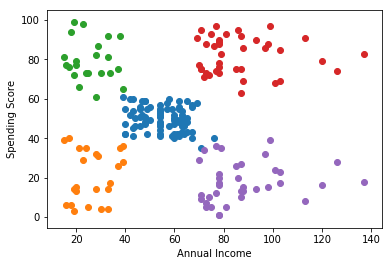

In [16]:
k=5
assignment=assign(whiten(obs), kmeans(whiten(obs),k)[0])
for i in range(k):
    plt.scatter(obs[assignment==i, 0], obs[assignment==i, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Data interpretation:

1) Мы можем разделить покупателей на три группы: пожилые, молодые с низким доходом и молодые с высоким доходом.

2) Молодые люди чаще ходят в супермаркет и совершают больше покупок, покупательский индекс старшего поколения меньше

3) Людей с высокой и низкой заработной платой можно разделить на две категории: тех, кто часто посещает данный супермаркет, и тех, кто редко делает в нем покупки. У покупателей со средним заработком средний покупательский индекс